In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.linalg import eig
import math as m
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter("ignore", np.ComplexWarning)


In [2]:
df_train = pd.read_csv('mnist_train.csv', header=None)
df_test = pd.read_csv('mnist_test.csv', header=None)

In [3]:
df_train.rename(columns={0: "label"}, inplace= True)
df_test.rename(columns={0: "label"}, inplace= True)

train_label = df_train.label.unique()
print('train label', np.sort(train_label))

test_label = df_test.label.unique()
print('test label', np.sort(test_label))

train label [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
test label [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [4]:
df_train[:10]

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Reshape X_train to 28*28 for image show 
X_train = df_train.iloc[:,1:].values
X_train = np.reshape(X_train, (X_train.shape[0], 28,28))

X_test = df_test.iloc[:, 1:].values
X_test = np.reshape(X_test, (X_test.shape[0], 28,28))

y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6000, 28, 28) (6000,) (1000, 28, 28) (1000,)


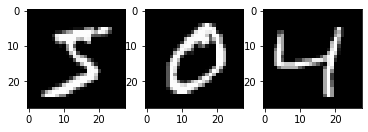

In [6]:
#show images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(X_train[0,:,:], cmap='gray')
plt.grid(False)

ax2.imshow(X_train[1,:,:], cmap='gray')
plt.grid(False)

ax3.imshow(X_train[2,:,:], cmap='gray')
plt.grid(False)

plt.show()

In [7]:
#reshape images for training
def reshape(X, n_pixels):
    X_reshaped = np.zeros((X.shape[0], n_pixels*n_pixels))
    for i in range(X.shape[0]):
        X_reshaped[i,:] = X[i,:,:].reshape(n_pixels*n_pixels)
    return X_reshaped
    
X_train_reshaped = reshape(X_train, 28)
X_test_reshaped = reshape(X_test, 28)

print(X_train_reshaped.shape, y_train.shape)
print(X_test_reshaped.shape, y_test.shape)

(6000, 784) (6000,)
(1000, 784) (1000,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_reshaped)
X_train_reshaped = scaler.transform(X_train_reshaped)
X_test_reshaped = scaler.transform(X_test_reshaped)
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(6000, 784)
(1000, 784)


### Implement PCA

#### PCA from scratch


In [70]:
#implement PCA
X_mean = np.mean(X_train_reshaped, axis=0)

def PCA_scratch(X, X_mean, n_components):
    X_diff = X-X_mean
    covariance_matrix = np.matmul(X_diff.T, X_diff)/(X.shape[0]-1)
    eig_value, eig_vector = np.linalg.eig(covariance_matrix)
    
    sort_eig_value = eig_value[:n_components]
    sort_eig_vector = eig_vector[:,:n_components]
    return eig_value, eig_vector, sort_eig_value, sort_eig_vector

def explained_variance(eig_value):
    explained_variance =[]
    for i in range(len(eig_value)):
        explained_variance.append(eig_value[i]/np.sum(eig_value))
    return explained_variance


In [71]:
def project_matrix(X, eig_vector, n_components):
    project_matrix=np.zeros((X.shape[0], n_components))
    for i in range(n_components):
        project = np.dot(X, eig_vector.T[i])
        project_matrix[:,i]=project
    return project_matrix
    
def column_list(n_components):
    column_list = []
    for i in range(1, (n_components+1)):
        PC_name = 'PC'+ str(i)
        column_list.append(PC_name)
    return column_list


In [72]:
eig_value_train, eig_vector_train, sort_eig_value_train, sort_eig_vector_train = PCA_scratch(X_train_reshaped, X_mean, 180)
print(sort_eig_value_train.shape, sort_eig_vector_train.shape)

(180,) (784, 180)


In [73]:
def plot_cum_var(eig_value):
    cumulative_var = []
    for i in range(len(eig_value)):
        var = explained_variance(eig_value)
        var_sum = np.sum(var[:i])
        cumulative_var.append(var_sum)
    return cumulative_var  

In [74]:
cumulative_var = plot_cum_var(eig_value_train)

Text(0.5, 1.0, 'Explained Variance vs number of Principle Components')

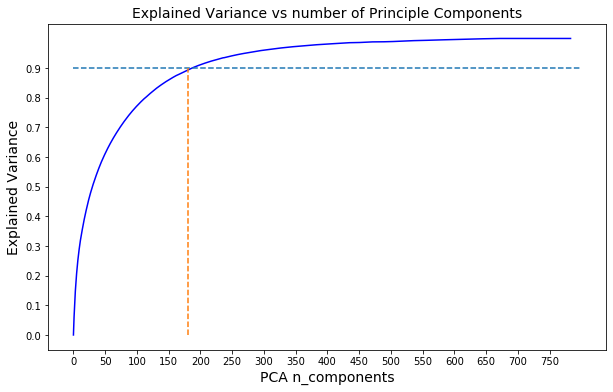

In [75]:
#plot graph finding the n_components explained 90% of variance

plt.figure(figsize=(10,6))
plt.plot(cumulative_var, 'b')

line1 = np.arange(0,800)
line2 = np.full((800), 0.90)
plt.plot(line1,line2, '--')

line3 = np.full((10), 180)
line4 = np.arange(0,1,0.1)
plt.plot(line3,line4, '--')

plt.xlabel('PCA n_components', fontsize=14)
plt.yticks(np.arange(0,1,0.1))
plt.xticks(np.arange(0,800,50))
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Explained Variance vs number of Principle Components', fontsize=14)

In [76]:
X_train_pca = project_matrix(X_train_reshaped, eig_vector_train, 180)
X_train_pca = pd.DataFrame(X_train_pca, columns = column_list(180))

X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180
0,-0.923623,4.728607,-0.221188,-7.286248,-1.672726,-0.758482,-0.459550,0.632735,0.624107,0.191497,...,1.625518,0.931221,-0.719427,-2.309292,-1.741029,-0.175136,0.799481,-0.339535,1.178803,-0.455391
1,8.668516,7.081823,-4.177232,-1.330220,0.936685,5.404732,0.619213,2.462486,0.546254,-2.679922,...,-0.206621,-1.416138,-0.795166,0.032370,0.086576,0.022224,0.240092,0.501724,0.630044,-0.328103
2,2.184643,-10.656058,-4.677756,0.660041,2.345919,-4.532362,17.166462,6.242628,1.180022,0.206795,...,-1.331469,1.748571,1.268319,-1.739821,-0.756222,-0.649673,1.992870,1.663018,1.375066,1.753694
3,-7.279640,3.171289,3.791508,-0.733869,6.652053,-2.673515,2.005065,-3.132033,-0.950279,-4.174532,...,0.084614,-0.635178,0.198202,-0.804424,0.083472,0.177370,0.234022,-0.457366,-0.440654,-0.823757
4,-5.069486,-4.236192,-5.356267,0.600962,-1.529389,0.824841,-0.542658,-3.796005,-0.870981,1.672146,...,-0.261678,0.060261,-0.133640,1.320618,-0.255281,-0.180824,0.344472,0.129606,0.871308,0.764205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2.732835,-10.146090,-14.994324,-5.615854,-1.522257,0.296724,-0.209105,14.415875,-2.036917,-1.758189,...,0.546616,1.638629,1.213223,-0.777300,0.692661,-0.084141,0.490207,1.039563,1.290666,-0.244882
5996,-1.153365,-0.545502,3.121557,8.138876,-5.118024,2.319521,0.089685,-0.891924,-0.980190,1.879589,...,0.570826,0.884487,0.799950,-0.747893,-0.322689,0.488858,0.072139,1.137505,0.506148,-0.395505
5997,-2.009641,10.082367,-1.295697,-6.505513,-1.190317,-2.263244,-3.216064,-2.111528,7.533899,-1.872223,...,0.155241,0.201332,0.303142,-1.536149,0.659953,0.063999,-0.237333,0.739020,-0.467635,0.686747
5998,0.964152,2.959672,0.352111,7.344013,-4.654266,5.037574,2.024139,5.434975,0.944929,-1.397711,...,-0.211748,-1.225846,0.363808,-0.248809,-0.242899,-0.438374,-0.467459,-0.632383,-0.053492,0.499046


In [77]:
X_test_pca = project_matrix(X_test_reshaped, sort_eig_vector_train, 180)
X_test_pca = pd.DataFrame(X_test_pca, columns = column_list(180))
X_test_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180
0,1.538399,3.425634,1.742886,7.058056,-7.369640,4.142360,2.847476,1.998406,3.473316,-3.346539,...,0.861666,0.159230,0.356818,-0.646823,0.845362,0.968919,0.170221,-0.609340,-0.808183,0.064582
1,18.338357,2.929508,-7.925655,0.728175,7.088419,5.221619,0.331785,4.199988,-2.796948,-2.911262,...,0.402587,0.184784,-0.485438,-0.168195,0.399178,-0.218906,0.213421,-0.191831,-0.290940,0.062842
2,-6.032685,-2.518001,2.811559,-0.673317,0.239335,5.096344,-0.080242,-0.566432,-1.035940,3.471743,...,0.279119,0.351085,-0.488540,-0.589569,-0.207051,0.479042,-0.076001,-0.126829,0.745232,0.826916
3,-6.915579,5.691058,5.027542,-0.317942,3.358556,-3.281546,-0.662304,0.757646,1.642806,-7.073274,...,0.238603,0.069596,-0.029612,-0.386270,-0.047780,0.069136,-0.176452,0.604053,0.708872,0.323073
4,-0.254956,-1.289918,-6.215666,-0.334577,2.311218,2.905994,0.982364,-2.999062,3.130430,3.504894,...,0.969054,0.300540,0.970567,0.195199,0.361848,0.015944,0.252063,0.595629,0.264598,-0.028904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.992465,-3.893996,-6.391928,0.723672,-4.308074,-0.852839,-3.770590,-2.067130,-1.832827,1.940210,...,0.355797,0.001269,-0.004079,0.561571,0.530848,0.221763,-0.702865,-0.029673,-0.463145,0.478907
996,-5.213341,-1.165185,0.154068,2.220167,-2.201727,3.115277,3.529375,-1.082284,2.587112,2.832506,...,0.210318,0.156031,0.826042,-1.441870,-0.229270,-0.692404,-0.789591,0.721333,-0.928071,0.477345
997,-2.567364,5.731101,-1.430037,-1.581115,3.334803,3.293971,1.524681,3.035521,5.296283,3.972908,...,1.148358,0.159605,-0.704217,-0.263485,1.335636,-0.320516,0.142681,0.445028,0.372085,0.275485
998,-8.000441,1.669964,3.890503,0.681353,4.751212,4.144599,0.863431,1.483871,0.705090,-1.987464,...,0.183616,-0.246587,0.163047,-0.042385,-0.024565,-0.133695,-0.110189,0.723255,-0.014310,0.061110


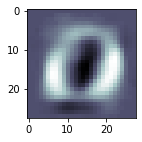

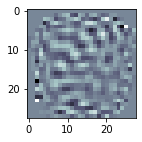

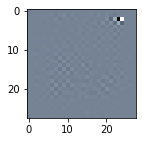

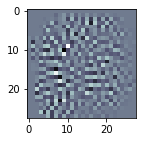

In [24]:
#plot image after applying with different number of principle components 
for i in range(0,750,200):
    n_pixels= 28
    plt.figure(figsize=(2,2))
    plt.imshow(eig_vector_train[:,i].reshape(n_pixels,n_pixels).real, cmap=plt.cm.bone)
    plt.show()


### K-Nearest Neighbor with Reduced dimension

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn_score_list2 = []
for i in range(10, 300, 10):
    neigh = KNeighborsClassifier(n_neighbors=1)
    
    eig_value_train, eig_vector_train, sort_eig_value_train, sort_eig_vector_train = PCA_scratch(X_train_reshaped, X_mean, i)
    X_train_pca = project_matrix(X_train_reshaped, sort_eig_vector_train, i)
    
    X_test_pca = project_matrix(X_test_reshaped, sort_eig_vector_train, i)
    
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    score = np.mean(y_test == y_pred)
    knn_score_list2.append(score)


Text(0.5, 1.0, 'KNN accuracy VS PCA n_components')

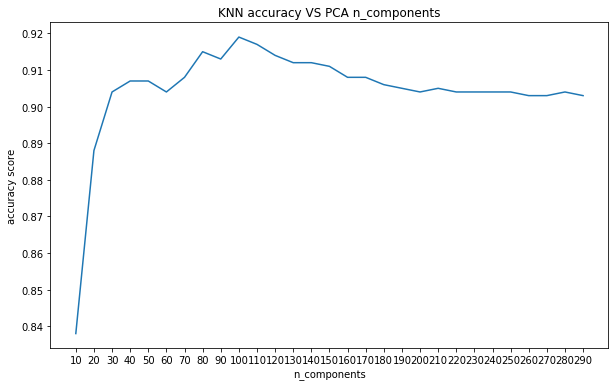

In [79]:
plt.figure(figsize=(10,6))
x = range(10, 300, 10)
plt.plot(x, knn_score_list2)
plt.xticks(range(10, 300, 10))
plt.xlabel('n_components')
plt.ylabel('accuracy score')
plt.title('KNN accuracy VS PCA n_components')


### K-mean clustering

In [27]:
def euclid_distance(x1, x2):
    return (sum((x1 - x2)**2))**0.5

In [28]:
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(0, cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distance = euclid_distance(cluster_array[i], centroid)
            distances.append(distance)
        min_val = min(distances)
        cluster = distances.index(min(distances))
        clusters.append(cluster)
    return clusters

In [29]:
def tune_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters,columns=['cluster'])], axis=1)
    for c in range(0,10):
        cluster_c  = cluster_df.loc[cluster_df['cluster']== c]
        cluster_c_mean = np.mean(cluster_c.iloc[:,:-1], axis=0)
        new_centroids.append(cluster_c_mean)
    return new_centroids

In [30]:
# Calculate variance within each cluster
def centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in range(0,10):
        cluster_c  = cluster_df.loc[cluster_df['cluster']== c]
        cluster_c = cluster_c.iloc[:,:-1]
        cluster_c_mean = np.mean(cluster_c, axis=0)
        mean_repeat = np.tile(cluster_c_mean,(cluster_c.shape[0],1))
        sum_squares.append(np.sum(np.sum((cluster_c - mean_repeat)**2)))
    return sum_squares

#### Plotting loss VS number of iterations

In [102]:
cluster_array = X_train_reshaped
k=10

centroids = []
for i in range(k):
    centroid = cluster_array[i]
    centroids.append(centroid) 

In [103]:
clusters = assign_clusters(centroids, cluster_array)
cluster_variance_3a = []

for i in range(1,75):
    centroids = tune_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var_3a = np.mean(centroid_variance(clusters, cluster_array))
    cluster_variance_3a.append(cluster_var_3a)
    print(i, round(cluster_var_3a))


1 345215.0
2 341456.0
3 339585.0
4 338000.0
5 336681.0
6 335599.0
7 334475.0
8 333822.0
9 333335.0
10 332962.0
11 332651.0
12 332401.0
13 332118.0
14 331928.0
15 331744.0
16 331632.0
17 331516.0
18 331419.0
19 331283.0
20 331159.0
21 331067.0
22 330989.0
23 330949.0
24 330919.0
25 330893.0
26 330873.0
27 330854.0
28 330840.0
29 330829.0
30 330822.0
31 330814.0
32 330806.0
33 330800.0
34 330789.0
35 330776.0
36 330758.0
37 330741.0
38 330718.0
39 330696.0
40 330680.0
41 330656.0
42 330634.0
43 330613.0
44 330579.0
45 330539.0
46 330499.0
47 330450.0
48 330388.0
49 330328.0
50 330234.0
51 330155.0
52 330049.0
53 329941.0
54 329836.0
55 329698.0
56 329527.0
57 329320.0
58 329154.0
59 329096.0
60 329067.0
61 329043.0
62 329023.0
63 329012.0
64 329003.0
65 328996.0
66 328989.0
67 328987.0
68 328984.0
69 328982.0
70 328981.0
71 328981.0
72 328980.0
73 328980.0
74 328980.0


Text(0, 0.5, 'Loss')

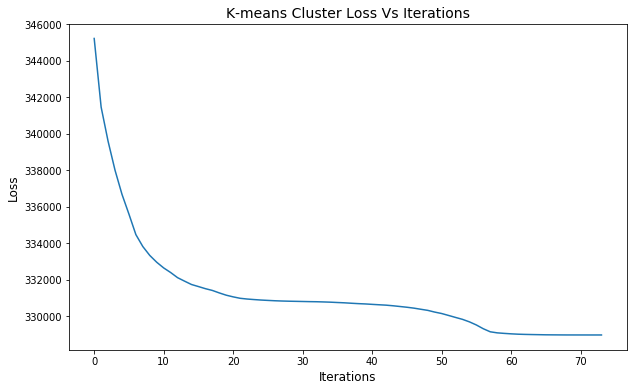

In [110]:
plt.figure(figsize=(10,6))
plt.plot(cluster_variance_3a)
plt.title('K-means Cluster Loss Vs Iterations', fontsize=14)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

#### Plotting loss VS the number of initial centroids

In [82]:
cluster_array = X_train_reshaped

def init_centroids(cluster_array, k):
    centroids = []
    for i in range(k):
        centroid = cluster_array[i]
        centroids.append(centroid) 
    return centroids


In [88]:
init_centroids_2 = init_centroids(cluster_array, 2)
init_centroids_4 = init_centroids(cluster_array, 4)
init_centroids_6 = init_centroids(cluster_array, 6)
init_centroids_8 = init_centroids(cluster_array, 8)
init_centroids_10 = init_centroids(cluster_array, 10)
init_centroids_12 = init_centroids(cluster_array, 12)
init_centroids_14 = init_centroids(cluster_array, 14)

initial_centroid_list = [init_centroids_2, init_centroids_4, init_centroids_6, init_centroids_8, init_centroids_10, init_centroids_12, init_centroids_14]

In [91]:
for init_centroids in initial_centroid_list:
    converge_var = []
    clusters = assign_clusters(init_centroids, cluster_array)
    cluster_variance_all = []
    for i in range(1,55):
        centroids = tune_centroids(clusters, cluster_array)
        clusters = assign_clusters(centroids, cluster_array)
        cluster_var = np.mean(centroid_variance(clusters, cluster_array))
        cluster_variance_all.append(cluster_var)
        print(i, round(cluster_var))
    print ('converged_variance', cluster_var)
    converge_var.append(cluster_var)


1 395361.0
2 394388.0
3 392495.0
4 389630.0
5 386406.0
6 384374.0
7 383701.0
8 383275.0
9 382912.0
10 382625.0
11 382405.0
12 382202.0
13 382028.0
14 381897.0
15 381823.0
16 381784.0
17 381762.0
18 381755.0
19 381751.0
20 381750.0
21 381749.0
22 381748.0
23 381748.0
24 381748.0
25 381748.0
26 381748.0
27 381748.0
28 381748.0
29 381748.0
30 381748.0
31 381748.0
32 381748.0
33 381748.0
34 381748.0
35 381748.0
36 381748.0
37 381748.0
38 381748.0
39 381748.0
40 381748.0
41 381748.0
42 381748.0
43 381748.0
44 381748.0
45 381748.0
46 381748.0
47 381748.0
48 381748.0
49 381748.0
50 381748.0
51 381748.0
52 381748.0
53 381748.0
54 381748.0
converged_variance 381748.2065098309
1 377136.0
2 375396.0
3 373411.0
4 371076.0
5 369224.0
6 367912.0
7 366959.0
8 366103.0
9 365595.0
10 365267.0
11 365044.0
12 364865.0
13 364727.0
14 364592.0
15 364452.0
16 364355.0
17 364275.0
18 364212.0
19 364143.0
20 364084.0
21 364039.0
22 364013.0
23 363994.0
24 363972.0
25 363948.0
26 363929.0
27 363913.0
28 363901

Text(0, 0.5, 'Loss')

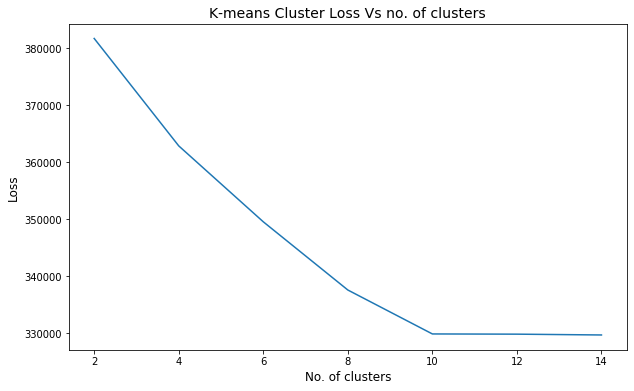

In [99]:
plt.figure(figsize=(10,6))
x = [2, 4, 6, 8, 10, 12, 14]
cluster_variance = [381748, 362876, 349539, 337555, 329835, 329797, 329654 ]
plt.plot(x, cluster_variance)
plt.title('K-means Cluster Loss Vs no. of clusters', fontsize=14)
plt.xlabel('No. of clusters', fontsize=12)
plt.ylabel('Loss', fontsize=12)


### K-means group data with and without dimension reduction

#### K-means group data without dimension reduction

In [115]:
y = pd.DataFrame(y_train, columns=['label'])
X_train_reshaped_df = pd.DataFrame(X_train_reshaped)
X_train_df = pd.concat([X_train_reshaped_df, y], axis=1)
X_train_df 

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,7.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,6.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,8.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.028464,-0.018869,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,6.0


In [116]:
def random_sample(data, label):
    random_sample_df = data.loc[data['label']== label]
    random_sample = random_sample_df.iloc[0]
    random_sample = random_sample[:-1]
    random_sample.to_numpy()
    return random_sample

c_0 = random_sample(X_train_df, 0)
c_1 = random_sample(X_train_df, 1)
c_2 = random_sample(X_train_df, 2)
c_3 = random_sample(X_train_df, 3)
c_4 = random_sample(X_train_df, 4)
c_5 = random_sample(X_train_df, 5)
c_6 = random_sample(X_train_df, 6)
c_7 = random_sample(X_train_df, 7)
c_8 = random_sample(X_train_df, 8)
c_9 = random_sample(X_train_df, 9)

centroids = [c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9]

centroids[0].shape

(784,)

In [117]:
cluster_array = X_train_reshaped
clusters = assign_clusters(centroids, cluster_array)

cluster_variance_4a = []

for i in range(0,75):
    centroids = tune_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(centroid_variance(clusters, cluster_array))
    cluster_variance_4a.append(cluster_var)
    print(i, round(cluster_var))


0 339127.0
1 335659.0
2 333986.0
3 333015.0
4 332598.0
5 332314.0
6 332134.0
7 331870.0
8 331600.0
9 331425.0
10 331255.0
11 331140.0
12 331047.0
13 330912.0
14 330859.0
15 330828.0
16 330797.0
17 330768.0
18 330731.0
19 330692.0
20 330666.0
21 330632.0
22 330526.0
23 330382.0
24 330257.0
25 330149.0
26 330075.0
27 329987.0
28 329891.0
29 329812.0
30 329747.0
31 329652.0
32 329540.0
33 329411.0
34 329275.0
35 329145.0
36 329097.0
37 329065.0
38 329041.0
39 329019.0
40 329000.0
41 328983.0
42 328973.0
43 328969.0
44 328963.0
45 328957.0
46 328952.0
47 328951.0
48 328950.0
49 328949.0
50 328948.0
51 328946.0
52 328945.0
53 328944.0
54 328942.0
55 328942.0
56 328942.0
57 328942.0
58 328942.0
59 328942.0
60 328942.0
61 328942.0
62 328942.0
63 328942.0
64 328942.0
65 328942.0
66 328942.0
67 328942.0
68 328942.0
69 328942.0
70 328942.0
71 328942.0
72 328942.0
73 328942.0
74 328942.0


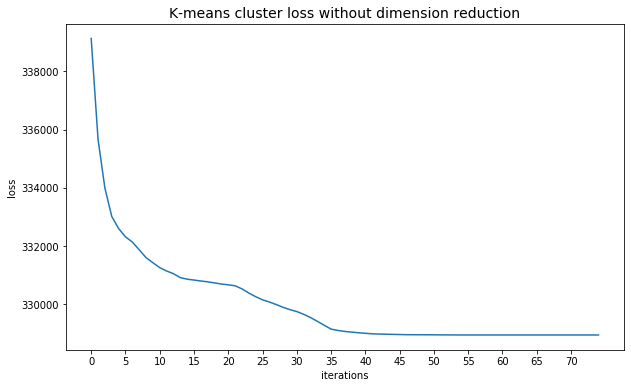

In [124]:
plt.figure(figsize=(10,6))
plt.plot(cluster_variance_4a);
plt.title('K-means cluster loss without dimension reduction', fontsize=14)
plt.ylabel('loss')
plt.xlabel('iterations')
x = range(0, 75, 5)
plt.xticks(x);

In [119]:
true = y_train
cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters,columns=['cluster']), pd.DataFrame(y_train,columns=['y'])], axis=1)
correct = pd.DataFrame(cluster_df['cluster']==cluster_df['y'], columns=['correct'])
cluster_df = pd.concat([cluster_df,correct], axis=1)
cluster_df

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,cluster,y,correct
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,3,5.0,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,0,0.0,True
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,4,4.0,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,1,1.0,True
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,9,9.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,4,7.0,False
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,6,6.0,True
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,8,8.0,True
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017573,-0.017487,0.0,0.0,0.0,0.0,0.0,6,6.0,True


In [120]:
def correct_pct(data):
    correct_pct_list = []
    for i in range(0,10):
        cluster_total = data.loc[data['cluster']==i]
        cluster = data.loc[(data['cluster']==i) & (data['correct']==True)]
        pct = cluster.shape[0]/cluster_total.shape[0]
        correct_pct_list.append(pct) 
    correct_pct = sum(correct_pct_list)/len(correct_pct_list)
    return correct_pct

In [121]:
correct_assigned_pct = correct_pct(cluster_df)
correct_assigned_pct

0.46888108489296865

#### K-means group data with dimension reduction

In [40]:
X_train = df_train.iloc[:,1:].values
X_test = df_test.iloc[:, 1:].values

y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6000, 784) (6000,) (1000, 784) (1000,)


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(6000, 784)
(1000, 784)


In [44]:
X_mean = np.mean(X_train, axis=0)

correct_pct_pca = []

for n in range(1,300,10):
    eig_value, eig_vector, sort_eig_value, sort_eig_vector = PCA_scratch(X_train, X_mean, n)
    X_train_pca = project_matrix(X_train, sort_eig_vector, n)
    cluster_array_pca = X_train_pca
    X_train_pca_df = pd.DataFrame(X_train_pca, columns = column_list(n))
    y = pd.DataFrame(y_train, columns=['label'])
    X_train_pca_df = pd.concat([X_train_pca_df, y], axis=1)
    
    c_0 = random_sample(X_train_pca_df, 0)
    c_1 = random_sample(X_train_pca_df, 1)
    c_2 = random_sample(X_train_pca_df, 2)
    c_3 = random_sample(X_train_pca_df, 3)
    c_4 = random_sample(X_train_pca_df, 4)
    c_5 = random_sample(X_train_pca_df, 5)
    c_6 = random_sample(X_train_pca_df, 6)
    c_7 = random_sample(X_train_pca_df, 7)
    c_8 = random_sample(X_train_pca_df, 8)
    c_9 = random_sample(X_train_pca_df, 9)
    centroids_pca = [c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9]
    
    clusters_pca = assign_clusters(centroids_pca, cluster_array_pca)
    cluster_variance = []
    for i in range(50):
        centroids_pca = tune_centroids(clusters_pca, cluster_array_pca)
        clusters_pca = assign_clusters(centroids_pca, cluster_array_pca)
        cluster_var = np.mean(centroid_variance(clusters_pca, cluster_array_pca))
        cluster_variance.append(cluster_var)
        print(i, round(cluster_var))
    
    cluster_df = pd.concat([pd.DataFrame(cluster_array_pca), pd.DataFrame(clusters_pca,columns=['cluster']), pd.DataFrame(y_train,columns=['y'])], axis=1)
    correct = pd.DataFrame(cluster_df['cluster']==cluster_df['y'], columns=['correct'])
    cluster_df = pd.concat([cluster_df, correct], axis=1)
    correct_assigned_pct = correct_pct(cluster_df)
    print(correct_assigned_pct)
    correct_pct_pca.append(correct_assigned_pct)


0 1723.0
1 1291.0
2 1045.0
3 904.0
4 809.0
5 759.0
6 711.0
7 669.0
8 638.0
9 615.0
10 592.0
11 571.0
12 555.0
13 540.0
14 527.0
15 513.0
16 502.0
17 495.0
18 488.0
19 483.0
20 477.0
21 473.0
22 470.0
23 467.0
24 465.0
25 463.0
26 461.0
27 459.0
28 457.0
29 455.0
30 453.0
31 451.0
32 449.0
33 447.0
34 445.0
35 443.0
36 440.0
37 438.0
38 436.0
39 434.0
40 431.0
41 430.0
42 428.0
43 427.0
44 426.0
45 425.0
46 424.0
47 422.0
48 421.0
49 420.0
0.2754274029988516
0 64697.0
1 62733.0
2 62056.0
3 61824.0
4 61706.0
5 61658.0
6 61639.0
7 61633.0
8 61630.0
9 61629.0
10 61629.0
11 61628.0
12 61628.0
13 61628.0
14 61628.0
15 61628.0
16 61628.0
17 61628.0
18 61628.0
19 61628.0
20 61628.0
21 61628.0
22 61628.0
23 61628.0
24 61628.0
25 61628.0
26 61628.0
27 61628.0
28 61628.0
29 61628.0
30 61628.0
31 61628.0
32 61628.0
33 61628.0
34 61628.0
35 61628.0
36 61628.0
37 61628.0
38 61628.0
39 61628.0
40 61628.0
41 61628.0
42 61628.0
43 61628.0
44 61628.0
45 61628.0
46 61628.0
47 61628.0
48 61628.0
49 61628.

Text(0.5, 1.0, 'K-means clustering accuracy Vs PCA n_components')

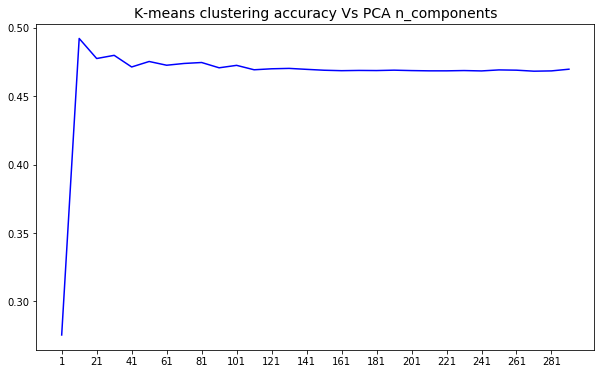

In [49]:
plt.figure(figsize=(10,6))
xticks = range(1, 300, 20)
plt.xticks(xticks)
x = range(1,300,10)
plt.plot(x, correct_pct_pca, 'b')
plt.title('K-means clustering accuracy Vs PCA n_components', fontsize=14)


#### Iterations Required for convergence VS PCA n_components

In [105]:
converge_iteration = [11, 11, 23, 22, 21, 25, 23, 21, 23, 19, 24, 23, 30, 34, 39, 38, 35, 38, 41, 39, 37, 42, 49, 45, 47, 49, 49, 44, 49]

Text(0.5, 1.0, 'Convergence iteration Vs PCA n_components')

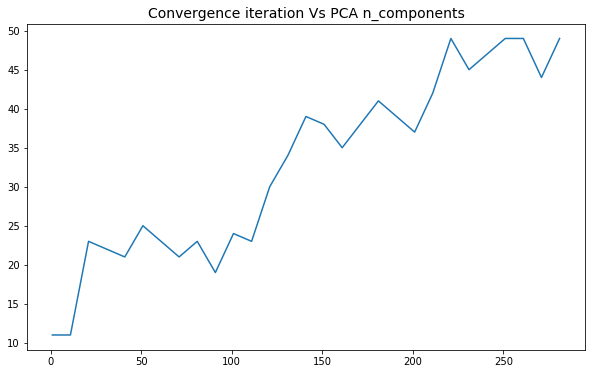

In [131]:
plt.figure(figsize=(10,6))
x_plot = range(1,290,10)
plt.plot(x_plot, converge_iteration)
plt.title('Convergence iteration Vs PCA n_components', fontsize=14)


### KNN and SVM classification with noisy dimension

In [46]:
noise_train = np.random.normal(0, .1, (X_train_reshaped.shape[0], 256))
X_train_signal = pd.concat([pd.DataFrame(X_train_reshaped), pd.DataFrame(noise_train)], axis=1)
X_train_signal.shape

(6000, 1040)

In [47]:
noise_test = np.random.normal(0, .1, (X_test_reshaped.shape[0], 256))
X_test_signal = pd.concat([pd.DataFrame(X_test_reshaped), pd.DataFrame(noise_test)], axis=1)
X_test_signal.shape

(1000, 1040)

In [86]:
def PCA_scratch(X, X_mean, n_components):
    X_diff = X-X_mean
    covariance_matrix = (X_diff.T @ X_diff)/(X.shape[0]-1)
    eig_value, eig_vector = np.linalg.eig(covariance_matrix)
    
    sort_eig_value = eig_value[:n_components]
    sort_eig_vector = eig_vector[:,:n_components]
    return eig_value, eig_vector, sort_eig_value, sort_eig_vector


#### KNN without noise data

In [116]:
X_train = df_train.iloc[:,1:].values
X_test = df_test.iloc[:, 1:].values

y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

X_mean = np.mean(X_train, axis=0)

knn_score_list_normal = []
for i in range(10, 300, 10):
    eig_value_train, eig_vector_train, sort_eig_value_train, sort_eig_vector_train = PCA_scratch(X_train, X_mean, i)
    X_train_pca = project_matrix(X_train, sort_eig_vector_train, i)
    X_test_pca = project_matrix(X_test, sort_eig_vector_train, i)
    
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    score = np.mean(y_test == y_pred)
    knn_score_list_normal.append(score)


Text(0.5, 1.0, 'Normal Data - KNN accuracy VS PCA n_components')

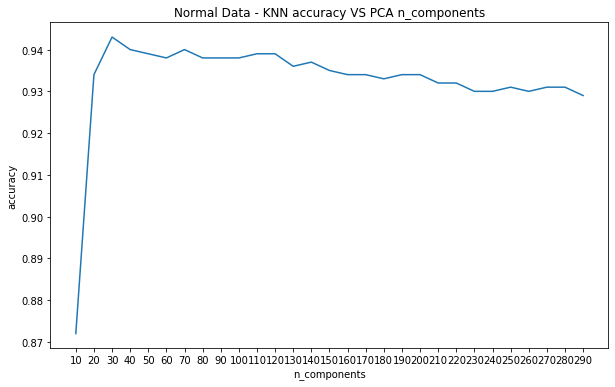

In [117]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, knn_score_list_normal)

x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('Normal Data - KNN accuracy VS PCA n_components')

#### KNN with noise data

In [49]:
X_mean_signal = np.mean(X_train_signal, axis=0)

knn_score_list_noise1 = []
for i in range(10, 300, 10):
    eig_value_train, eig_vector_train, sort_eig_value_train, sort_eig_vector_train = PCA_scratch(X_train_signal, X_mean_signal, i)
    X_train_pca_signal = project_matrix(X_train_signal, sort_eig_vector_train, i)
    X_test_pca_signal = project_matrix(X_test_signal, sort_eig_vector_train, i)
    
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train_pca_signal, y_train)
    y_pred_signal = neigh.predict(X_test_pca_signal)
    score = np.mean(y_test == y_pred_signal)
    knn_score_list_noise1.append(score)


Text(0.5, 1.0, 'Noisy Data - KNN accuracy VS PCA n_components')

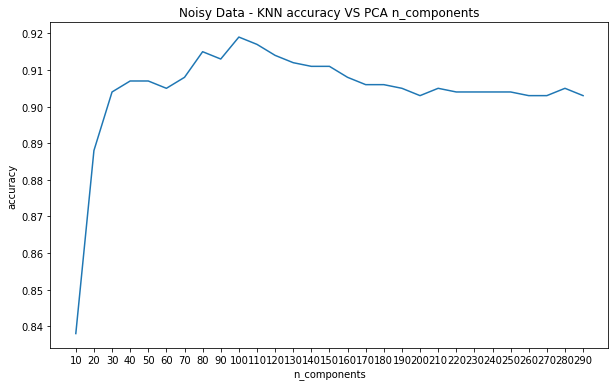

In [62]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, knn_score_list_noise1)

x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('Noisy Data - KNN accuracy VS PCA n_components')

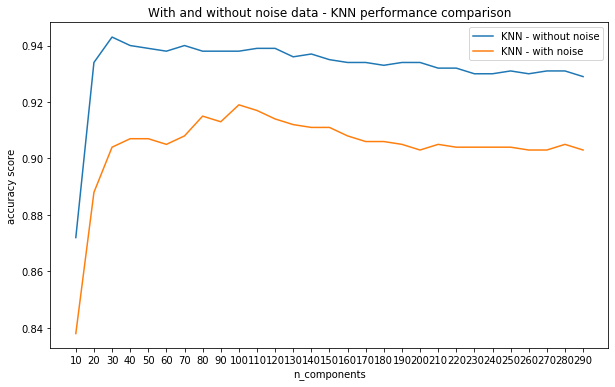

In [119]:
# KNN performance comparison on noisy and normal data
plt.figure(figsize=(10,6))

x = range(10, 300, 10)
plt.plot(x, knn_score_list_normal, label='KNN - without noise')
plt.plot(x, knn_score_list_noise1, label = 'KNN - with noise')

x_ = range(10, 300, 10)
plt.xticks(x_);

plt.xticks(range(10, 300, 10))
plt.xlabel('n_components')
plt.ylabel('accuracy score')
plt.title('With and without noise data - KNN performance comparison')
plt.legend()

#### SVC with and without noise data

In [91]:
X_train = df_train.iloc[:,1:].values
X_test = df_test.iloc[:, 1:].values

y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_mean = np.mean(X_train, axis=0)
print(X_mean.shape)

(6000, 784) (6000,) (1000, 784) (1000,)
(784,)


In [93]:
#Apply SVC C=1 with normal data 
X_mean = np.mean(X_train, axis=0)

from sklearn.svm import SVC

SVC_score_list_5 = []
for i in range(10, 300, 10):
    eig_value_train, eig_vector_train, sort_eig_value_train, sort_eig_vector_train = PCA_scratch(X_train, X_mean, i)
    X_train_pca = project_matrix(X_train, sort_eig_vector_train, i)
    
    X_test_pca = project_matrix(X_test, sort_eig_vector_train, i)

    clf = SVC(gamma='auto', kernel='linear', C=1)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    score = np.mean(y_test == y_pred)
    SVC_score_list_5.append(score)


Text(0.5, 1.0, 'Normal Data - SVC (C=1) accuracy VS PCA n_components')

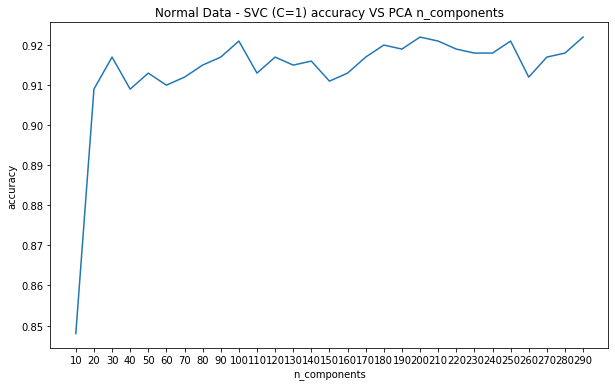

In [94]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, SVC_score_list_5)

x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('Normal Data - SVC (C=1) accuracy VS PCA n_components')

In [53]:
# Apply SVC C= 1 with noisy data
from sklearn.svm import SVC

SVC_score_list_noise1a = []
for i in range(10, 300, 10):
    eig_value_train, eig_vector_train, sort_eig_value_train, sort_eig_vector_train = PCA_scratch(X_train_signal, X_mean_signal, i)
    X_train_pca_signal = project_matrix(X_train_signal, sort_eig_vector_train, i)
    
    X_test_pca_signal = project_matrix(X_test_signal, sort_eig_vector_train, i)

    clf = SVC(gamma='auto', kernel='linear', C=1)
    clf.fit(X_train_pca_signal, y_train)
    y_pred = clf.predict(X_test_pca_signal)

    score = np.mean(y_test == y_pred)
    SVC_score_list_noise1a.append(score)


Text(0.5, 1.0, 'Noisy Data - SVC (C=1) accuracy VS PCA n_components')

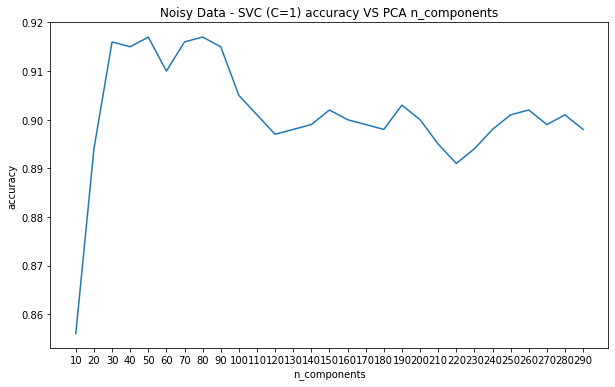

In [60]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, SVC_score_list_noise1a)

x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('Noisy Data - SVC (C=1) accuracy VS PCA n_components')

In [95]:
# Apply SVC C=0.005 with normal data 

SVC_score_list_5b = []
for i in range(10, 300, 10):
    eig_value_train, eig_vector_train, sort_eig_value_train, sort_eig_vector_train = PCA_scratch(X_train, X_mean, i)
    X_train_pca = project_matrix(X_train, sort_eig_vector_train, i)
    
    X_test_pca = project_matrix(X_test, sort_eig_vector_train, i)

    clf = SVC(gamma='auto', kernel='linear', C=0.005)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    score = np.mean(y_test == y_pred)
    SVC_score_list_5b.append(score)

Text(0.5, 1.0, 'Noisy Data - SVC (C=0.005) accuracy VS PCA n_components')

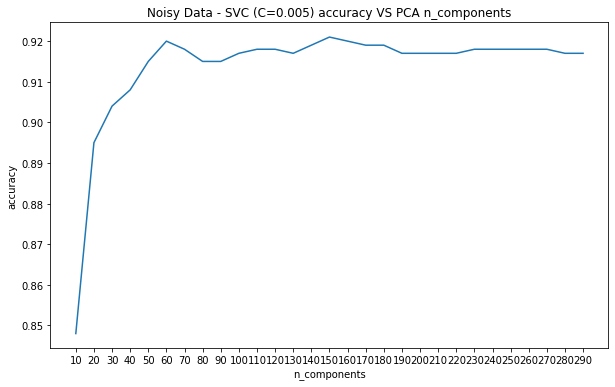

In [96]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, SVC_score_list_5b)

x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('Noisy Data - SVC (C=0.005) accuracy VS PCA n_components')

In [55]:
# Apply SVC C=0.005 with noisy data 

SVC_score_list_noise2 = []
for i in range(10, 300, 10):
    eig_value_train, eig_vector_train, sort_eig_value_train, sort_eig_vector_train = PCA_scratch(X_train_signal, X_mean_signal, i)
    X_train_pca_signal = project_matrix(X_train_signal, sort_eig_vector_train, i)
    
    X_test_pca_signal = project_matrix(X_test_signal, sort_eig_vector_train, i)

    clf = SVC(gamma='auto', kernel='linear', C=0.005)
    clf.fit(X_train_pca_signal, y_train)
    y_pred = clf.predict(X_test_pca_signal)

    score = np.mean(y_test == y_pred)
    SVC_score_list_noise2.append(score)


Text(0.5, 1.0, 'Noisy Data - SVC accuracy with C = 0.005 VS PCA n_components')

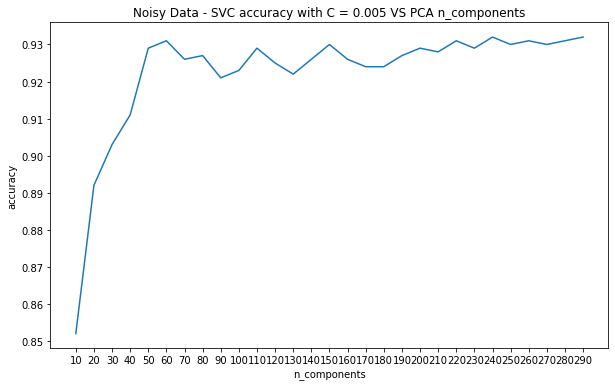

In [61]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, SVC_score_list_noise2)

x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('Noisy Data - SVC accuracy with C = 0.005 VS PCA n_components')

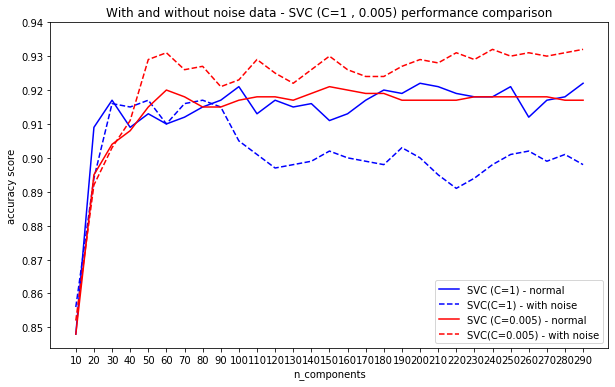

In [122]:
# SVC performance comparison on noisy and normal data

plt.figure(figsize=(10,6))

x = range(10, 300, 10)
plt.plot(x, SVC_score_list_5, 'b', label='SVC (C=1) - normal')
plt.plot(x, SVC_score_list_noise1a, 'b--', label = 'SVC(C=1) - with noise', )

plt.plot(x, SVC_score_list_5b, 'r', label='SVC (C=0.005) - normal')
plt.plot(x, SVC_score_list_noise2, 'r--', label = 'SVC(C=0.005) - with noise')

x_ = range(10, 300, 10)
plt.xticks(x_);
y_ = np.arange(0.85, 0.95, 0.01)
plt.yticks(y_)
plt.xlabel('n_components')
plt.ylabel('accuracy score')
plt.title('With and without noise data - SVC (C=1 , 0.005) performance comparison')
plt.legend()


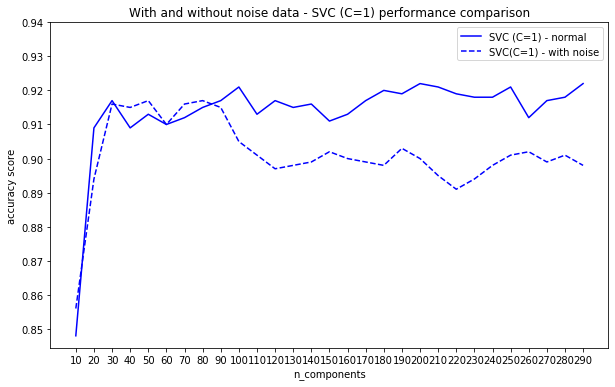

In [125]:
# SVC C = 1 performance comparison on noisy and normal data

plt.figure(figsize=(10,6))

x = range(10, 300, 10)
plt.plot(x, SVC_score_list_5, 'b', label='SVC (C=1) - normal')
plt.plot(x, SVC_score_list_noise1a, 'b--', label = 'SVC(C=1) - with noise', )

x_ = range(10, 300, 10)
plt.xticks(x_);
y_ = np.arange(0.85, 0.95, 0.01)
plt.yticks(y_)
plt.xlabel('n_components')
plt.ylabel('accuracy score')
plt.title('With and without noise data - SVC (C=1) performance comparison')
plt.legend()


#### Overall Models KNN, SVC (C=1), SVC (C=0.005) comparison with and without noisy data 

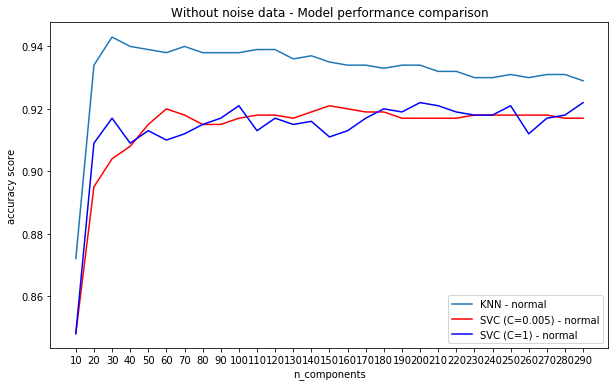

In [128]:
#KNN, SVM (C=1), SVM (C=0.005) model comparison on normal data 

plt.figure(figsize=(10,6))

x = range(10, 300, 10)
plt.plot(x, knn_score_list_normal, label='KNN - normal')
plt.plot(x, SVC_score_list_5b, 'r', label='SVC (C=0.005) - normal')
plt.plot(x, SVC_score_list_5, 'b', label='SVC (C=1) - normal')

x_ = range(10, 300, 10)
plt.xticks(x_);

plt.xticks(range(10, 300, 10))
plt.xlabel('n_components')
plt.ylabel('accuracy score')
plt.title('Without noise data - Model performance comparison')
plt.legend()

Text(0.5, 1.0, 'Noisy Data - KNN, SVC (C=1), SVC (C=0.005) accuracy comparision')

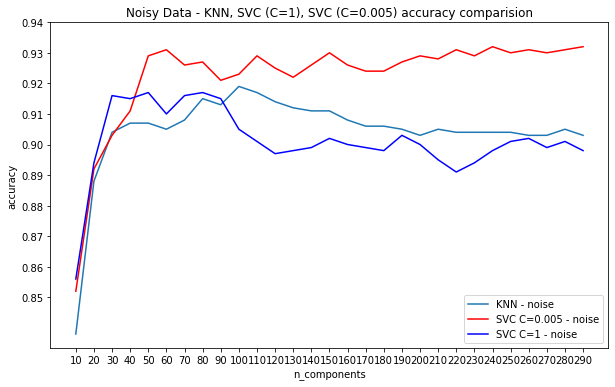

In [130]:
#KNN, SVM (C=1), SVM (C=0.005) model comparison on noisy data 
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, knn_score_list_noise1, label='KNN - noise')
plt.plot(x, SVC_score_list_noise2, 'r', label='SVC C=0.005 - noise')
plt.plot(x, SVC_score_list_noise1a, 'b', label='SVC C=1 - noise')


plt.legend()
x_ = range(10, 300, 10)
plt.xticks(x_);
y_ = np.arange(0.85,0.95,0.01)
plt.yticks(y_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('Noisy Data - KNN, SVC (C=1), SVC (C=0.005) accuracy comparision')

#### Noisy data - applying PCA using sklearn library for checking

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
knn_score_list_noise_lib = []
for i in range(10, 300, 10):
    pca = PCA(n_components=i)
    pca.fit(X_train_signal)
    X_train_signal_pca = pca.transform(X_train_signal)
    X_test_signal_pca = pca.transform(X_test_signal)
    
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train_signal_pca, y_train)
    y_pred = neigh.predict(X_test_signal_pca)
    score = np.mean(y_test == y_pred)
    knn_score_list_noise_lib.append(score)


Text(0.5, 1.0, 'KNN accuracy VS PCA n_components')

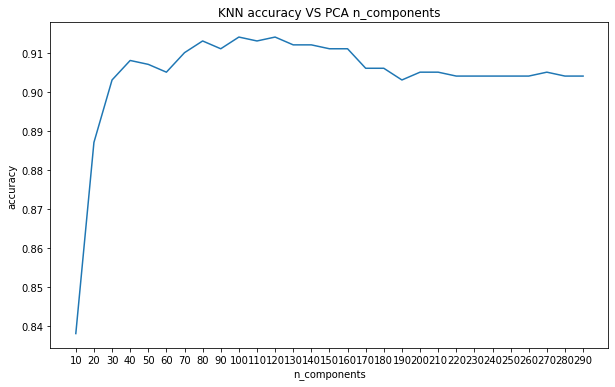

In [111]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, knn_score_list_noise_lib)
x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('KNN accuracy VS PCA n_components')

In [112]:
knn_score_list_lib = []
for i in range(10, 300, 10):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    score = np.mean(y_test == y_pred)
    knn_score_list_lib.append(score)

Text(0.5, 1.0, 'KNN accuracy VS PCA n_components')

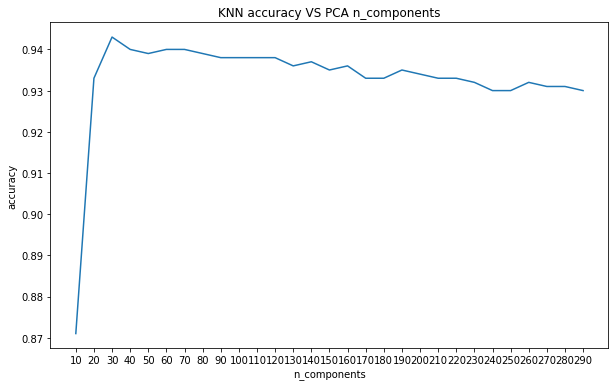

In [113]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, knn_score_list_lib)
x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('KNN accuracy VS PCA n_components')

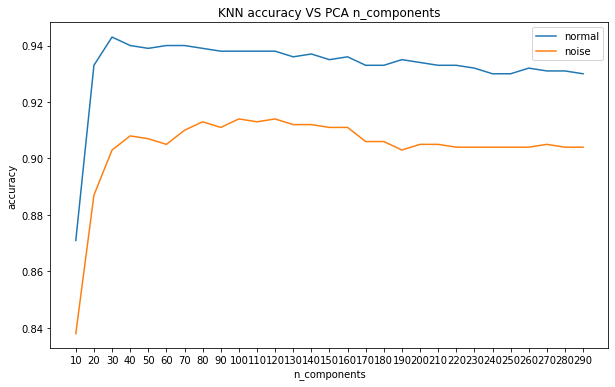

In [115]:
x = range(10, 300, 10)
plt.figure(figsize=(10,6))
plt.plot(x, knn_score_list_lib, label='normal')
plt.plot(x, knn_score_list_noise_lib, label='noise')
x_ = range(10, 300, 10)
plt.xticks(x_);
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('KNN accuracy VS PCA n_components')
plt.legend()

In [140]:
noise_train = np.random.normal(0, .1, (X_train_reshaped.shape[0], 256))
X_train_signal = pd.concat([pd.DataFrame(X_train_reshaped), pd.DataFrame(noise_train)], axis=1)
print(X_train_signal.shape)

noise_test = np.random.normal(0, .1, (X_test_reshaped.shape[0], 256))
X_test_signal = pd.concat([pd.DataFrame(X_test_reshaped), pd.DataFrame(noise_test)], axis=1)
print(X_test_signal.shape)

from sklearn.svm import SVC
SVC_score_list_noise_lib1 = []
for i in range(10, 300, 10):
    pca = PCA(n_components=i)
    pca.fit(X_train_signal)
    X_train_signal_pca = pca.transform(X_train_signal)
    X_test_signal_pca = pca.transform(X_test_signal)
    
    clf = SVC(gamma='auto', kernel='linear', C=1)
    clf.fit(X_train_signal_pca, y_train)
    y_pred = clf.predict(X_test_signal_pca)

    score = np.mean(y_test == y_pred)
    SVC_score_list_noise_lib1.append(score)

(6000, 1040)
(1000, 1040)


In [142]:
SVC_score_list_noise_lib2 = []
for i in range(10, 300, 10):
    pca = PCA(n_components=i)
    pca.fit(X_train_signal)
    X_train_signal_pca = pca.transform(X_train_signal)
    X_test_signal_pca = pca.transform(X_test_signal)
    
    clf = SVC(gamma='auto', kernel='linear', C=0.005)
    clf.fit(X_train_signal_pca, y_train)
    y_pred = clf.predict(X_test_signal_pca)

    score = np.mean(y_test == y_pred)
    SVC_score_list_noise_lib2.append(score)

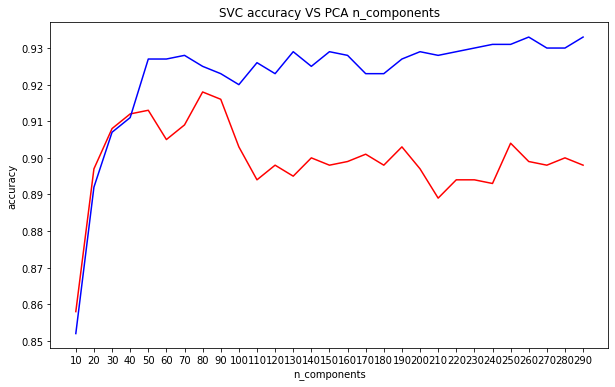

In [145]:
plt.figure(figsize=(10,6))
x = range(10, 300, 10)
plt.plot(x, SVC_score_list_noise_lib1, 'r')
plt.plot(x, SVC_score_list_noise_lib2, 'b')
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('SVC accuracy VS PCA n_components')
x_ = range(10, 300, 10)
plt.xticks(x_);